# FICHE n°4 : Mouvement de Mercure, variations du vecteur vitesse et masse du Soleil

L’étude porte sur le mouvement de Mercure, les positions étant obtenues sur le site des éphémérides pour 11 dates démarrant le 1/1/2017 et espacées de 8 jours. Les variations du vecteur vitesse au cours du temps permettent d’estimer une valeur de la masse solaire. 

**Capacité numérique mise en œuvre** : Utiliser un langage de programmation pour étudier la relation approchée entre la variation du vecteur vitesse d’un système modélisé par un point matériel entre deux instants voisins et la somme des forces appliquées sur celui-ci.

## 1. Représentation des vecteurs vitesse

In [0]:
import numpy as np
import matplotlib.pyplot as plt

t=8*np.arange(11)
Xmes=np.array([-0.2,2.9,5.4,6.4,5,1.2,-3.4,-6.4,-6.9,-5.7,-3.3])
Ymes=np.array([-8.2,-7.3,-4.9,-1.2,2.9,5.3,4.7,1.5,-2.3,-5.5,-7.5])
x=Xmes*0.46/8.2
y=Ymes*0.46/8.2

**Calcul des vitesses et des accélérations**

In [0]:
vxl=[]
m=np.arange(len(t)-2)
for i in m :
    vx=(x[i+2]-x[i])/(t[i+2]-t[i])
    vxl.append(vx)

vyl=[]
m=np.arange(len(t)-2)
for i in m :
    vy=(y[i+2]-y[i])/(t[i+2]-t[i])
    vyl.append(vy)

axl=[]
m=np.arange(len(t)-4)
for i in m :
    ax=(vxl[i+2]-vxl[i])/(t[i+2]-t[i])
    axl.append(ax)

ayl=[]
m=np.arange(len(t)-4)
for i in m :
    ay=(vyl[i+2]-vyl[i])/(t[i+2]-t[i])
    ayl.append(ay)

**Réprésentation des vecteurs vitesse**

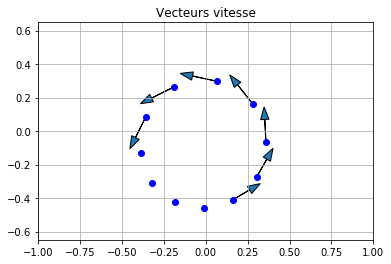

In [31]:
for i in m :
    plt.arrow(x[i+1],y[i+1],5*vxl[i],5*vyl[i],head_width=0.05)

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Vecteurs vitesse")
plt.grid()
plt.plot(x,y,'bo')
plt.show()

## 2. Détermination de la masse du Soleil




* Le script précédent fournit les directions et sens des vecteurs vitesse, mais il y a un problème d’échelle
* Pour rendre notre étude quantitative, on convertit les valeurs de vitesses dans les unités correctes pour pouvoir définir les vecteurs variation de la vitesse. Cette manipulation des listes axl et ayl nécessite de les transformer préalablement en tableau numpy (en effet, on ne peut pas effectuer d’opérations numériques sur des listes) : c’est le sens des lignes type :  ayln=1.5*10**11*np.array(ayl)/(24*3600)**2
* Dans un deuxième temps, le script calcule, pour tous les points de mesure, la norme de la variation du vecteur vitesse. Ensuite, le produit de cette norme par le carré de la distance d2 est calculé. D’après le principe fondamental de la dynamique, en considérant Mercure uniquement soumis à l’action du Soleil, ce produit doit être égal à GMs où G est la constante de gravitation universelle et Ms la masse du soleil. Il faut ici prendre garde à redimensionner les listes de distances pour qu’elles contiennent autant de valeurs que de valeurs calculées d’accélération. 
* Il faut aussi prendre garde à bien faire correspondre les valeurs de distance et d’accélération calculée (il faut ainsi décaler la liste des distances (c’est le sens de la commande dr=d[ 2:] qui enlève les 2 premiers termes de la liste d) et de x[ :-2], qui enlève les 2 derniers termes de la liste x).
* On peut ensuite faire modéliser la fonction précédente par une constante et faire afficher la valeur expérimentale de la masse du Soleil. Pour pouvoir faire varier l’échelle à loisir, il vaut mieux définir des grandeurs plus petites (ce qui explique la présence de 1020).
* Remarque : la commande "%.1e"%M sert à ne garder qu’un chiffre après la virgule pour M.

La masse du soleil est de l ordre de 1.7e+30 kg


Text(0, 0.5, 'valeur du produit GMs x10^20')

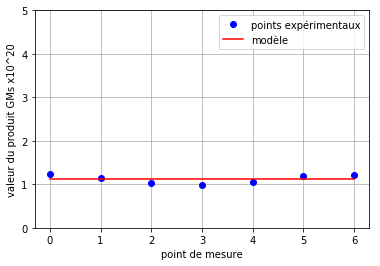

In [32]:
ayln=1.5*10**11*np.array(ayl)/(24*3600)**2 # on convertit les échelles de distance et de temps en unités SI
axln=1.5*10**11*np.array(axl)/(24*3600)**2 # idem
norma=(ayln**2+axln**2)**(1/2)             # on calcule la norme de l'accélération
dx=x[:-2]*1.5*10**11                       # on enlève les deux dernières valeurs de dx
dy=y[:-2]*1.5*10**11                       # idem pour uy
d=(dx**2+dy**2)**(1/2)                     # on calcule la distance pour les listes coupées

dr=d[2:]                     # on enlève les deux premières valeurs
GM=dr**2*norma               # on calcule la valeur du produit GM
GMth=6.67*10**(-11)*2*10**30 # valeur tabulée de GM
n=np.arange(len(t)-4) 
plt.plot(n,GM*10**(-20),'bo',label="points expérimentaux")
plt.legend()
plt.grid()

mod=np.polyfit(n,GM,0)                                      # on modélise la liste des valeurs de GM par une constante (polynôme d'ordre 0) 
M=float(mod[0]/(6.67*10**(-11)))                            # on calcule la masse du soleil
print('La masse du soleil est de l ordre de',"%.1e"%M,'kg') # la commande "%.1e"%M sert à ne garder qu'1 seul CS pour M 
GMmod=0*n+mod[0]                                            # on définit une fonction à partir de la valeur modélisée, pour pouvoir tracer. 
plt.plot(n,(GMmod)*10**(-20),'r-',label="modèle")
plt.legend()
plt.ylim(0,5)
plt.xlabel("point de mesure")
plt.ylabel("valeur du produit GMs x10^20")

**Conclusion** : la masse obtenue est très proche de la valeur tabulée.

**Remarque** : on peut aussi faire tracer la norme de l’accélération en fonction de $1/distance^2$, pour vérifier que l’on a bien une évolution linéaire, la pente de la fonction modèle étant alors le facteur GMs avec Ms obtenue précédemment. 


Text(0, 0.5, 'accélération')

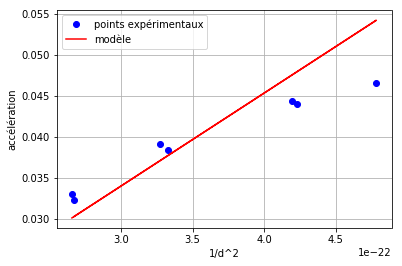

In [19]:
drci=1/(dr)**2
plt.plot(drci,norma,'bo',label="points expérimentaux")
plt.legend()
plt.grid()
model=6.67*10**(-11)*1.7*10**30*drci
plt.plot(drci,model,'r-',label="modèle")
plt.legend()
plt.xlabel("1/d^2")
plt.ylabel("accélération")
